In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [642]:
!curl 'https://api.st-retrospect.dh-center.ru/graphql' -H 'Accept-Encoding: gzip, deflate, br' -H 'Content-Type: application/json' -H 'Accept: application/json' -H 'Connection: keep-alive' -H 'DNT: 1' -H 'Origin: https://api.st-retrospect.dh-center.ru' --data-binary '{"query":"# Write your query or mutation here\n{\n  persons {\n    id\n    lastName\n    firstName\n    profession\n    description\n    birthDate\n    deathDate\n    relations {\n      id\n      location {\n        id\n        coordinateX\n        coordinateY\n        description\n      }\n    }\n  }\n}"}' --compressed > data.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2345k  100 2344k  100   307  1738k    227  0:00:01  0:00:01 --:--:-- 1739k


In [768]:
with open('data.json', 'r') as f:
    data = json.load(f)

In [769]:
df['description'] = df.description.apply(lambda x: x['ru'] if 'ru' in x and x.get('ru') else '')

In [770]:
# df['profession'] = df.profession.apply(
#     lambda x: x.get('ru', '').lower().replace(' и ', ' ').replace(' из ', ' ').replace(' .i ', ' ')\
#                              .replace(' в ', ' ').replace('(', '').replace(')', '').replace('-', ' ')\
#                              .replace(' 1740 ', ' ').replace(' 1741 ', ' ')
#                              .replace('\xad', '').replace(' 1801 ', ' ').replace(' а. ', '')\
#                              .replace(' 1894 ', ' ').replace(' 1825 ', ' ').replace('–', '').replace(' при ', ' ')\
#                              .replace(' от ', '').replace(' 1797 ', ' ').replace(' 1799 ', ' ').replace(' 1989 ', ' ')
#                              .replace(' 1990 ', ' ').replace(' от ', '').replace(' от ', '').replace(' от ', '')\
#                              .replace(' 1 ', ' ').replace(' 1905 ', ' ').replace(' го ', ' ').replace(' xviii ', ' ')\
#                              .replace(' 1935. ', ' ').replace(' 1991. ', ' ').replace(' 1799 ', ' ').replace(' века ', ' ')\
#     .replace(' i ', ' ').replace('а.', ' ').replace(' 1799 ', ' ').replace(' 1809 ', ' ').replace(' 1843 ', ' ')\
#     .replace('и.', ' ').replace('в.', ' ').replace(' 1878 ', ' ').replace(' 1775 ', ' ').replace(' 1764 ', ' ')\
#     .replace(' на ', ' ').replace('1730', ' ').replace(' 1953 ', ' ').replace('19241926', ' ').replace(' 1812. ', ' ')\
#     .replace('i.', ' ').replace('1949', ' ').replace(' 1945. ', ' ').replace(' был ', ' ').replace(' правления ', ' ')\
#     .replace(' 1775 ', ' ').replace('годах', ' ').replace(' связи ', ' ').replace('1945.', ' ').replace('1917', ' ')\
#     .replace(' 1907 ', ' ').replace('1730', ' ').replace('1953', ' ').replace('19241926', ' ').replace('1852', ' ')\
#     .replace('1918', '').replace('xx', '').replace(',', ' ').replace('.', '').replace('1855', '').replace('1944', '').replace('i', '').split()
#         if 'ru' in x and x.get('ru') else '')

# import collections
# ps = collections.Counter()
# for profs in df['profession'].values:
#     ps.update(profs)
# ps = list(filter(lambda x: ps[x] > 9, ps))

# df['profession'] = df['profession'].apply(lambda x: [i if i in x else 0 for i in ps])

In [771]:
df_2 = pd.read_csv('./data_persons_professions_v3.csv').drop(
    ['Unnamed: 0', 'Unnamed: 0.1', 'firstName', 'lastName'], axis=1\
).set_index('id')

In [772]:
df_3 = df.set_index('id').join(df_2, on='id')

In [773]:
df_3

,birthDate,deathDate,description,firstName,lastName,profession,relations,professionClean,full_name
id,,,,,,,,,
5d83443c0cb433003f223ae5,1778,1829,,Исаак,{'ru': 'Аблец'},[],"[{'id': '5d8344450cb433003f223ea0', 'location'...",танцы,Аблец Исаак
5d83443c0cb433003f223ae6,05.04.1937,,,Нина,{'ru': 'Авдошина-Володарская'},[],[],певцы,Авдошина-Володарская Нина
5d83443c0cb433003f223ae7,,,,Давид,{'ru': 'Аграновский'},[],[],певцы,Аграновский Давид
5d83443c0cb433003f223ae8,1853,1916,,Николай,{'ru': 'Аистов'},[],[],танцы,Аистов Николай
5d83443c0cb433003f223ae9,27.04.1887,19.01.1972,,Софья,{'ru': 'Акимова'},[],[],наука,Акимова Софья
5d83443c0cb433003f223aea,,,,Леонид,{'ru': 'Александров'},[],[],композиторы,Александров Леонид
5d83443c0cb433003f223aeb,,,,Сергей,{'ru': 'Алексашкин'},[],[],певцы,Алексашкин Сергей
5d83443c0cb433003f223aec,,,,Иван,{'ru': 'Алексеев'},[],[],певцы,Алексеев Иван
5d83443c0cb433003f223aed,,,,Владимир,{'ru': 'Альтшулер'},[],[],NaN,Альтшулер Владимир


In [774]:
df_4 = df_3[['full_name', 'professionClean', 'relations']]

In [775]:
df_4 = df_4[df_4['relations'].apply(lambda x: bool(len(x)))]

In [776]:
df_5 = df_4.dropna()

In [777]:
df_5

,full_name,professionClean,relations
id,,,
5d83443c0cb433003f223ae5,Аблец Исаак,танцы,"[{'id': '5d8344450cb433003f223ea0', 'location'..."
5d83443c0cb433003f223af3,Антарова Конкордия,певцы,"[{'id': '5d98e3f7cc7c890af2565be4', 'location'..."
5d83443c0cb433003f223af5,Аренский Антон,композиторы,"[{'id': '5d8344450cb433003f223eb7', 'location'..."
5d83443c0cb433003f223afb,Баринова Римма,певцы,"[{'id': '5d9ce070cc7c89716e56637e', 'location'..."
5d83443c0cb433003f223b04,Бородин Александр,композиторы,"[{'id': '5d98e2c5cc7c891f41565bda', 'location'..."
5d83443c0cb433003f223b0e,Ваганова Агриппина,танцы,"[{'id': '5d9af24acc7c896169565fec', 'location'..."
5d83443c0cb433003f223b17,Глазунов Александр,музыка,"[{'id': '5d8344450cb433003f223e98', 'location'..."
5d83443c0cb433003f223b32,Збруева Евгения,певцы,"[{'id': '5d9a11cacc7c8984cd565e2c', 'location'..."
5d83443d0cb433003f223b4a,Островский Александр,литература,"[{'id': '5d9ef67bcc7c89a5d9566a99', 'location'..."


In [778]:
location_data = []
for p_id, row, relations in zip(df_5.index, df_5.drop('relations', axis=1).values, df_5.relations.values):
    for location in relations:
        if location.get('location') and location['location'].get('coordinateX') and location['location'].get('coordinateY'):
            location_data.append([p_id, row[0], row[1], location['location']['id'], location['location']['coordinateX'], location['location']['coordinateY'], location['location']['description'].get('ru', '')])
location_data = pd.DataFrame(location_data, columns=['person_id', 'name', 'prof', 'loc_id', 'x', 'y', 'loc_desc'])


In [779]:
location_data

,person_id,name,prof,loc_id,x,y,loc_desc
0,5d83443c0cb433003f223ae5,Аблец Исаак,танцы,5d83443e0cb433003f223c06,59.935660,30.311700,В угловой части дома на пятом этаже находилась...
1,5d83443c0cb433003f223af3,Антарова Конкордия,певцы,5d98da8acc7c8952fb565bba,59.943008,30.270205,"Комплекс зданий, в которых располагались Бесту..."
2,5d83443c0cb433003f223af5,Аренский Антон,композиторы,5d83443f0cb433003f223c1e,59.925863,30.297596,Здание Санкт-Петербургской Государственной Кон...
3,5d83443c0cb433003f223af5,Аренский Антон,композиторы,5d83443f0cb433003f223c1f,59.932008,30.286269,Первым владельцем участка дома №58 на Английск...
4,5d83443c0cb433003f223afb,Баринова Римма,певцы,5d9cd6d4cc7c895c23566374,59.927763,30.349510,Дом № 6 был возведен по заказу коллежского рег...
5,5d83443c0cb433003f223b04,Бородин Александр,композиторы,5d98da8acc7c8952fb565bba,59.943008,30.270205,"Комплекс зданий, в которых располагались Бесту..."
6,5d83443c0cb433003f223b0e,Ваганова Агриппина,танцы,5d9af117cc7c894a25565fea,59.926463,30.306157,Согласно плану Пб 1798 участок принадлежал асе...
7,5d83443c0cb433003f223b0e,Ваганова Агриппина,танцы,5d94b684cc7c89f9265657b9,59.930278,30.335812,"одна из старейших балетных школ мира, с именем..."
8,5d83443c0cb433003f223b0e,Ваганова Агриппина,танцы,5d9e468bcc7c89e5ae566857,59.930233,30.333644,Академия русского балета им. А. Я. Вагановой (...
9,5d83443c0cb433003f223b17,Глазунов Александр,музыка,5d83443f0cb433003f223c20,59.932509,30.322049,"Дом 10 отмечен памятной доской с надписью ""В э..."


In [780]:
import collections
prof_set = set()

d = collections.defaultdict(lambda: collections.defaultdict(int))

for i in location_data.values:
    d[i[3]][i[2]] += 1
    prof_set.add(i[2])

dd = {}
for i in d.keys():
    dd[i] = max(d[i], key=d[i].get)

In [781]:
location_data['class'] = -1

In [782]:
location_data = location_data.set_index('loc_id')

In [783]:
for i in dd.keys():
    location_data.loc[i, 'class'] = dd[i]

In [784]:
location_data = location_data[['x', 'y', 'class', 'loc_desc']].drop_duplicates()

In [785]:
location_data['class_id'] = location_data['class'].astype('category').cat.codes

In [786]:
location_data.class_id.nunique()

16

In [787]:
location_data['xy'] = list(zip(location_data['x'], location_data['y']))

In [788]:
bb = (location_data['y'] < 30.4) & (location_data['y'] > 30.2) & (location_data['x'] > 59.8) & (location_data['x'] < 60)

In [789]:
location_data = location_data[bb]

In [790]:
location_data = location_data.drop(['x', 'y'], axis=1)

In [791]:
maps_1 = {'архитектура': 'художественные деятели',
 'певцы': 'музыка',
'художники': 'художественные деятели',
'композиторы': 'музыка' ,
'танцы': 'танцы',
'литература': 'литература',
'музыка': 'музыка',
'актеры': 'актеры',
'общественные деятели': 'общественные деятели',
'религия': 'общественные деятели',
'наука': 'наука',
'военные деятели': 'военные деятели',
'предпринимательство': 'предпринимательство',
'спорт': 'танцы',
'плотничный': 'предпринимательство',
'благотворительность': 'предпринимательство'
}

In [792]:
location_data['class'] = location_data['class'].map(maps_1)

location_data['class_id'] = location_data['class'].astype('category').cat.codes

In [793]:
res = []
for i in location_data.values:
    res.append({'name': i[0], 'desc': i[1], 'class': i[2], 'xy': i[3]})

In [794]:
location_data

,class,loc_desc,class_id,xy
loc_id,,,,
5d83443e0cb433003f223c06,танцы,В угловой части дома на пятом этаже находилась...,7,"(59.93566, 30.3117)"
5d98da8acc7c8952fb565bba,музыка,"Комплекс зданий, в которых располагались Бесту...",3,"(59.9430076, 30.2702054)"
5d83443f0cb433003f223c1e,музыка,Здание Санкт-Петербургской Государственной Кон...,3,"(59.925863, 30.297596)"
5d83443f0cb433003f223c1f,музыка,Первым владельцем участка дома №58 на Английск...,3,"(59.932008, 30.286269)"
5d9cd6d4cc7c895c23566374,музыка,Дом № 6 был возведен по заказу коллежского рег...,3,"(59.927763, 30.34951)"
5d9af117cc7c894a25565fea,танцы,Согласно плану Пб 1798 участок принадлежал асе...,7,"(59.926463, 30.306157)"
5d94b684cc7c89f9265657b9,танцы,"одна из старейших балетных школ мира, с именем...",7,"(59.930278, 30.335812)"
5d9e468bcc7c89e5ae566857,танцы,Академия русского балета им. А. Я. Вагановой (...,7,"(59.9302332, 30.3336438)"
5d83443f0cb433003f223c20,музыка,"Дом 10 отмечен памятной доской с надписью ""В э...",3,"(59.932509, 30.322049)"


In [795]:
with open('points_cloud_9.json', 'w', encoding='utf-8') as f:
    json.dump(res, f)

In [796]:
list(prof_set)

['предпринимательство',
 'танцы',
 'литература',
 'плотничный',
 'художники',
 'композиторы',
 'актеры',
 'военные деятели',
 'религия',
 'спорт',
 'общественные деятели',
 'музыка',
 'архитектура',
 'наука',
 'певцы',
 'благотворительность']

In [434]:

df['lastName'] = df.lastName.apply(lambda x: x['ru'] if 'ru' in x and x.get('ru') else '')
df['profession'] = df.profession.apply(
    lambda x: x.get('ru', '').lower().replace(' и ', ' ').replace(' из ', ' ').replace(' .i ', ' ')\
                             .replace(' в ', ' ').replace('(', '').replace(')', '').replace('-', ' ')\
                             .replace(' 1740 ', ' ').replace(' 1741 ', ' ')
                             .replace('\xad', '').replace(' 1801 ', ' ').replace(' а. ', '')\
                             .replace(' 1894 ', ' ').replace(' 1825 ', ' ').replace('–', '').replace(' при ', ' ')\
                             .replace(' от ', '').replace(' 1797 ', ' ').replace(' 1799 ', ' ').replace(' 1989 ', ' ')
                             .replace(' 1990 ', ' ').replace(' от ', '').replace(' от ', '').replace(' от ', '')\
                             .replace(' 1 ', ' ').replace(' 1905 ', ' ').replace(' го ', ' ').replace(' xviii ', ' ')\
                             .replace(' 1935. ', ' ').replace(' 1991. ', ' ').replace(' 1799 ', ' ').replace(' века ', ' ')\
    .replace(' i ', ' ').replace('а.', ' ').replace(' 1799 ', ' ').replace(' 1809 ', ' ').replace(' 1843 ', ' ')\
    .replace('и.', ' ').replace('в.', ' ').replace(' 1878 ', ' ').replace(' 1775 ', ' ').replace(' 1764 ', ' ')\
    .replace(' на ', ' ').replace('1730', ' ').replace(' 1953 ', ' ').replace('19241926', ' ').replace(' 1812. ', ' ')\
    .replace('i.', ' ').replace('1949', ' ').replace(' 1945. ', ' ').replace(' был ', ' ').replace(' правления ', ' ')\
    .replace(' 1775 ', ' ').replace('годах', ' ').replace(' связи ', ' ').replace('1945.', ' ').replace('1917', ' ')\
    .replace(' 1907 ', ' ').replace('1730', ' ').replace('1953', ' ').replace('19241926', ' ').replace('1852', ' ')\
    .replace('1918', '').replace('xx', '').replace(',', ' ').replace('.', '').replace('1855', '').replace('1944', '').replace('i', '').split()
        if 'ru' in x and x.get('ru') else '')
df = df.drop('id', axis=1)


import collections
ps = collections.Counter()
for profs in df['profession'].values:
    ps.update(profs)
ps = list(filter(lambda x: ps[x] > 9, ps))

df['profession'] = df['profession'].apply(lambda x: [1 if i in x else 0 for i in ps])

ohe = OneHotEncoder()
names = ohe.fit_transform(df[['firstName', 'lastName']]).toarray()
texts = TfidfVectorizer(min_df=0.01, max_df=0.05).fit_transform(df['description']).toarray()

df = pd.concat([df, pd.DataFrame(np.vstack(df.profession.values)), pd.DataFrame(names), pd.DataFrame(texts)], axis=1)
df.drop(['profession', 'firstName', 'lastName', 'birthDate', 'deathDate', 'description'], axis=1, inplace=True)

df = df[df['relations'].apply(lambda x: bool(len(x)))]
df['relations'] = df['relations'].apply(lambda x: [i['location'] for i in x if i['location']])

df['location_len'] = df['relations'].apply(lambda x: len(x))
df['location_len'] /= df['location_len'].max()

df['mean_coords_X'] = df['relations'].apply(lambda x: np.mean([i['coordinateX'] for i in x if i['coordinateX']]))
df['mean_coords_Y'] = df['relations'].apply(lambda x: np.mean([i['coordinateY'] for i in x if i['coordinateY']]))

df['mean_coords_X'] -= 59.93
df['mean_coords_Y'] -= 30.33
# df['mean_coords_X'] /= df['mean_coords_X'].max()
# df['mean_coords_Y'] /= df['mean_coords_Y'].max()

In [435]:
location_data = []
for row, relations in zip(df.drop('relations', axis=1).values, df.relations.values):
    for location in relations:
        if location['coordinateX'] and location['coordinateY']:
            location_data.append([location['id'], location['coordinateX'], location['coordinateY']])
location_data = pd.DataFrame(location_data)

In [439]:
location_data[0].nunique()

810

In [423]:
data = df.drop(['relations'], axis=1)

In [424]:
location_data = location_data.groupby([0, 1]).mean().reset_index()

In [427]:
location_data

,0,1,2,3,4,5,6,7,8,9,...,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587
0,30.365460,59.937613,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,-3.278830,3.279307
1,59.421800,30.233800,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128205,-0.452832,-0.052182
2,59.424500,30.235300,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076098,0.131868,-0.258021,-0.088408
3,59.425200,30.234400,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141026,-0.343684,-0.041259
4,59.425300,30.230900,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.128205,-0.452832,-0.052182
5,59.425400,30.234200,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141026,-0.343684,-0.041259
6,59.455300,30.462400,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102564,-0.302601,-0.028036
7,59.511300,30.033500,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,-0.315689,-0.115911
8,59.522000,30.194700,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,-0.306639,-0.097532
9,59.530400,29.543100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188034,-0.202591,-0.206613


In [390]:
import seaborn as sns

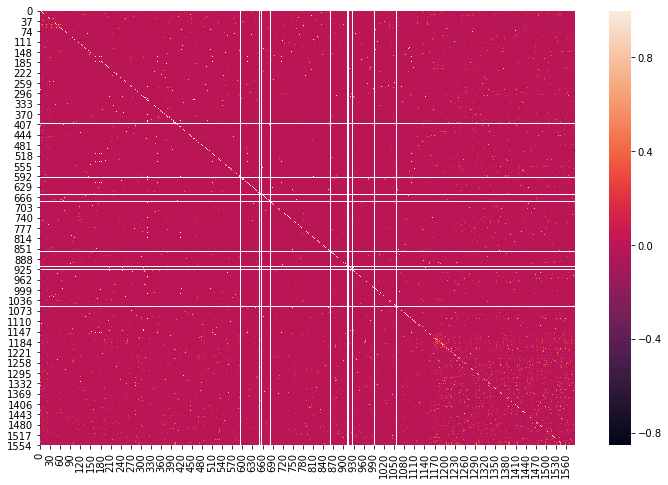

In [391]:
plt.figure(figsize=(12, 8))
sns.heatmap(location_data.corr())

In [408]:
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation

In [393]:
location_data.shape

(788, 1588)

In [409]:
df_tsne = LatentDirichletAllocation(n_components=2)
df_tsne.fit_transform(location_data.loc[:, 2:], )

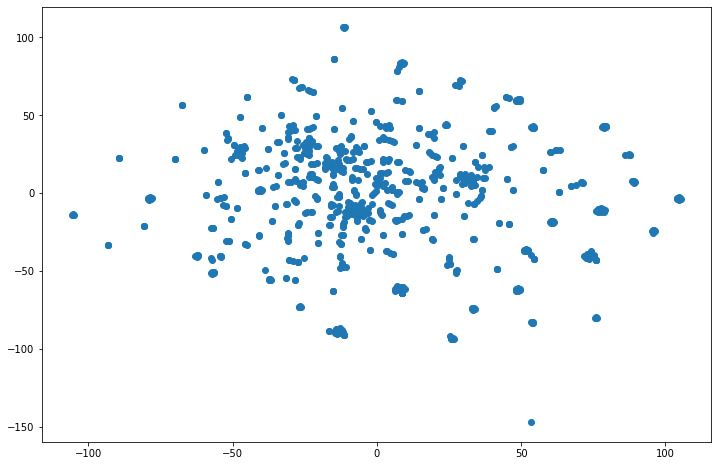

In [395]:
plt.figure(figsize=(12, 8))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1])

In [396]:
# location_data = []
# for row, relations in zip(data, df.relations.values):
#     for location in relations:
#         if location['coordinateX'] and location['coordinateY']:
#             location_data.append([location['coordinateX'], location['coordinateY'], row])
# location_data = np.array(location_data)

In [397]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering

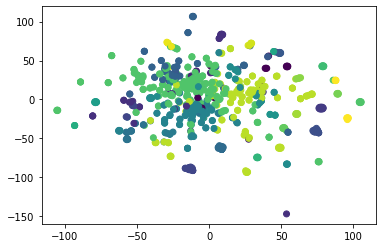

In [398]:
kmeans = KMeans(30)
data = kmeans.fit_predict(location_data.loc[:, :])
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=data)

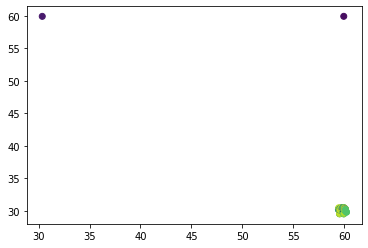

In [399]:
plt.scatter(location_data[0], location_data[1], c=data)

In [400]:
b = location_data[1] < 40

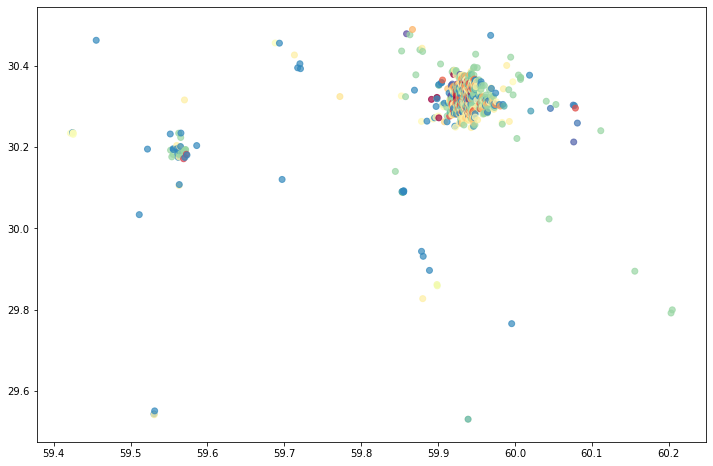

In [401]:
plt.figure(figsize=(12, 8))
plt.scatter(location_data.loc[b, 0], location_data.loc[b, 1], c=data[b], alpha=0.7, cmap=plt.cm.Spectral)

In [402]:
bb = (location_data[1] < 30.4) & (location_data[1] > 30.2) & (location_data[0] > 59.8) & (location_data[0] < 60)

In [403]:
location_data.loc[bb, 0].shape

(683,)

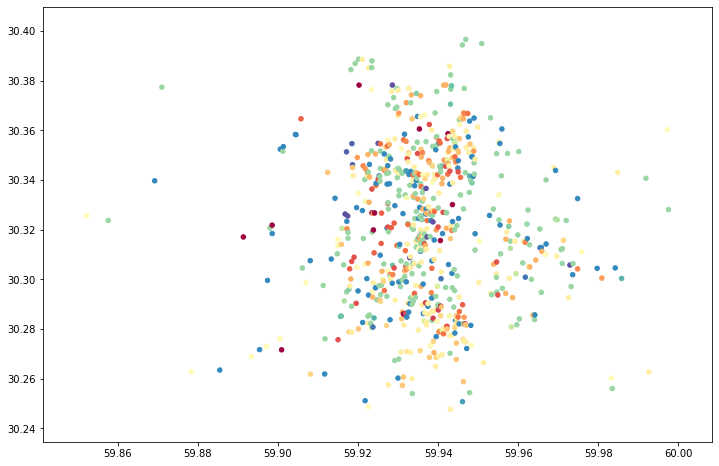

In [404]:
plt.figure(figsize=(12, 8))
plt.scatter(location_data.loc[bb, 0], location_data.loc[bb, 1], c=data[bb], cmap=plt.cm.Spectral, s=20)

In [282]:
# q = []
# for i in range(len(data[bb])):
#     q.append({'xy': [float(df.coordinateX[bb].values[i]), float(df.coordinateY[bb].values[i])],
#               'class': int(data[bb][i])})

In [283]:
import json

In [245]:
with open('points_cloud.json', 'w') as f:
    json.dump(q, f)

In [209]:
import numpy as np

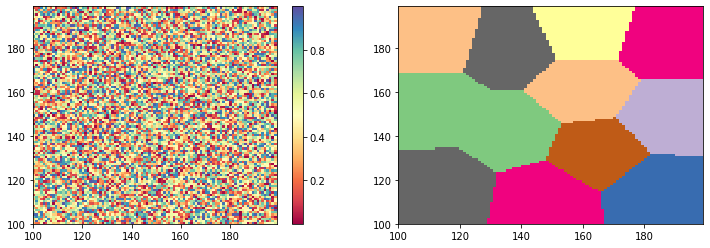

In [213]:
x = np.arange(100,200,1)
y = np.arange(100,200,1)
value = np.random.random(100*100)

xx,yy = np.meshgrid(x,y)
xx = xx.reshape(100*100)
yy = yy.reshape(100*100)
j = np.dstack((xx,yy,value))[0,:,:]

fig = plt.figure(figsize =(12,4))
ax1 = plt.subplot(121)
xi,yi = np.meshgrid(x,y)
va    = value.reshape(100,100)
pc = plt.pcolormesh(xi,yi,va,cmap = plt.cm.Spectral)
plt.colorbar(pc)

ax2 = plt.subplot(122)
y_pred = KMeans(n_clusters=12).fit_predict(j)
vb = y_pred.reshape(100,100)
plt.pcolormesh(xi, yi, vb, cmap = plt.cm.Accent)

In [223]:
plt.pcolormesh(xx, yy, Z)

array([18, 24, 11, 19,  5, 12,  8, 11, 18, 22,  3, 27, 29, 10, 16, 10,  2,
       21, 19, 11,  2, 19,  2, 22, 22, 10, 20, 22, 25,  3,  3,  3, 18, 29,
       18, 29, 12, 15,  3, 26, 15, 10,  2, 27, 27, 28,  3,  2, 27, 15, 18,
        3,  1, 26, 26, 14, 22, 10, 22, 15, 29,  7,  1, 22, 22, 22, 15, 22,
       21,  7, 25, 29, 26, 10,  6, 18,  3, 20,  6, 22, 15, 11, 11, 22, 18,
       21, 15,  2,  3,  0,  0, 12,  2,  8, 18,  0, 24, 18,  1, 18, 18, 22,
       14, 17, 18,  2, 14, 28, 18, 25, 17, 19, 19,  2,  3,  0, 14, 28, 16,
        6, 16, 10, 16,  3, 12, 24,  7,  3,  3, 10,  2, 14, 10, 19, 10, 10,
        9, 10, 20,  5, 20, 18, 29, 29,  7,  6, 29, 28, 18, 19, 18, 14, 19,
        6, 12, 12, 22, 21,  7,  1, 12, 10, 20, 12, 25, 15, 11, 11, 10,  8,
       17, 10, 15,  7, 27, 12,  9,  7,  2, 15,  7,  0,  4, 17,  4,  7, 12,
        9,  3,  3, 14,  3, 20,  4,  4,  4,  4,  9,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4, 14,  7,  2, 15, 21,  3, 10, 19, 15,  6, 28, 17,
       23,  8,  3,  2, 17

TypeError: Input must be a 2D array.

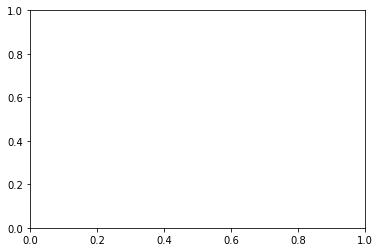

In [222]:
for i in range(12):
    plt.contour(data == i, colors=['b']) 